In [4]:
# Dependencies and Setup
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [5]:
# File to Load (Remember to Change These)
file_to_load = "data/CleanTrain_merged.csv"

# Read Purchasing File and store into Pandas data frame
Train_data = pd.read_csv(file_to_load)
Train_data.head()

,Store,DayOfWeek,Date,month,year,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,7/31/2015,7,2015,5263,555,1,1,0,1,1270.0,9,2008,0
1,1,4,7/30/2015,7,2015,5020,546,1,1,0,1,1270.0,9,2008,0
2,1,3,7/29/2015,7,2015,4782,523,1,1,0,1,1270.0,9,2008,0
3,1,2,7/28/2015,7,2015,5011,560,1,1,0,1,1270.0,9,2008,0
4,1,1,7/27/2015,7,2015,6102,612,1,1,0,1,1270.0,9,2008,0


In [6]:
Train_data.dropna()
Train_data.head()


,Store,DayOfWeek,Date,month,year,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,5,7/31/2015,7,2015,5263,555,1,1,0,1,1270.0,9,2008,0
1,1,4,7/30/2015,7,2015,5020,546,1,1,0,1,1270.0,9,2008,0
2,1,3,7/29/2015,7,2015,4782,523,1,1,0,1,1270.0,9,2008,0
3,1,2,7/28/2015,7,2015,5011,560,1,1,0,1,1270.0,9,2008,0
4,1,1,7/27/2015,7,2015,6102,612,1,1,0,1,1270.0,9,2008,0


##### Checking For Outliers

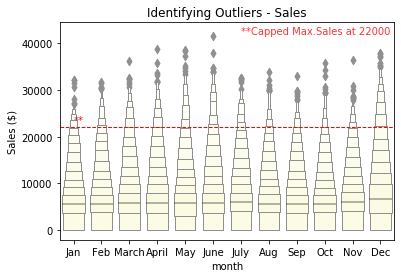

In [7]:
year_sales = sns.boxenplot(data=Train_data,scale="linear",x="month",y="Sales",color="lightyellow")
year_sales.axhline(22000, ls='--', color="red", alpha =1, linewidth = 1)
year_sales.text(0,23000, "**", alpha=1, color="red")
year_sales.text(6,42000, "**Capped Max.Sales at 22000", alpha=.8, color="red")
plt.title("Identifying Outliers - Sales")
plt.ylabel("Sales ($)")
year_sales.set_xticklabels(["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)

plt.savefig('output/sales_outlier.png', dpi= 100)

#### Checked for sales outliers. Capped max.sales at 22000

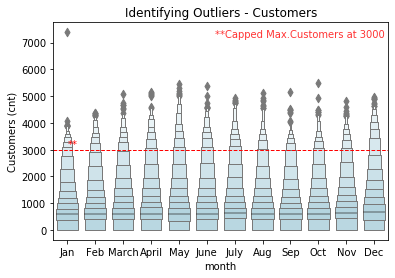

In [8]:
year_customer = sns.boxenplot(data=Train_data,y="Customers", x="month", scale="linear",color="lightblue")
year_customer.axhline(3000, ls='--', color="red", alpha =1, linewidth = 1)
year_customer.text(0,3100, "**", alpha=1, color="red")
year_customer.text(5.3,7200, "**Capped Max.Customers at 3000", alpha=.8, color="red")
plt.title("Identifying Outliers - Customers")
plt.ylabel("Customers (cnt)")
year_customer.set_xticklabels(["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)

plt.savefig('output/customers_outlier.png', dpi= 100)

#### Checked for customers count outlier. Capped max.customers at 3000

In [9]:
Train_data["Sales"]=Train_data["Sales"].apply(lambda x: 20000 if x>20000 else x)
Train_data["Customers"]=Train_data["Customers"].apply(lambda y: 3000 if y>3000 else y)
print(max(Train_data["Sales"]))
print(max(Train_data["Customers"]))

20000
3000


In [10]:
clean_data = Train_data.loc[(Train_data['Sales'] < 20000) & (Train_data['Sales'] > 100) & (Train_data['Customers'] < 3000)]


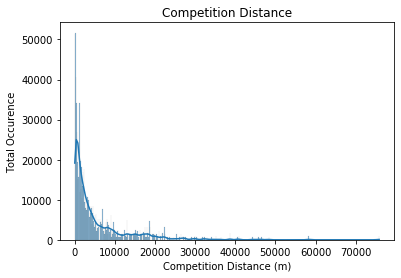

In [11]:
distance = sns.histplot(data=clean_data, x="CompetitionDistance", kde=True)
plt.title("Competition Distance")
plt.xlabel("Competition Distance (m)")
plt.ylabel("Total Occurence")
plt.savefig('output/competitionDistance.png', dpi= 100)

#### Competition distance matters. There are more customers when the competition is closer.

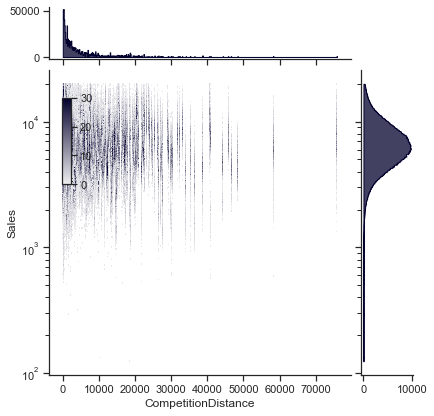

In [12]:
sns.set_theme(style="ticks")

g = sns.JointGrid(data=clean_data, x="CompetitionDistance", y="Sales", marginal_ticks=True)

g.ax_joint.set(yscale="log")

cax = g.fig.add_axes([.15, .55, .02, .2])

g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")


plt.savefig('output/CompetitionDistance_Sales.png', dpi= 200)

#### The competition distance does not affect the amount in sales.

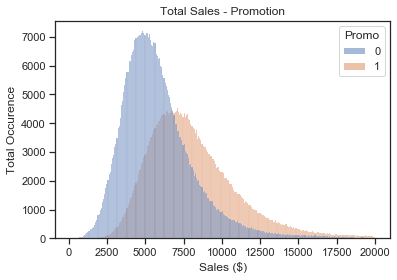

In [13]:
promo = sns.histplot(data=clean_data, x="Sales", hue="Promo")
plt.title("Total Sales - Promotion")
plt.ylabel("Total Occurence")
plt.xlabel("Sales ($)")

plt.savefig('output/sales_promo.png', dpi= 100)

#### More larger sales with promo

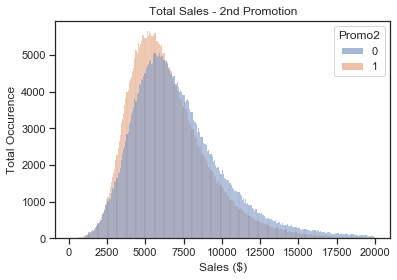

In [14]:
promo2 = sns.histplot(data=clean_data, x="Sales", hue="Promo2")
plt.title("Total Sales - 2nd Promotion")
plt.ylabel("Total Occurence")
plt.xlabel("Sales ($)")
plt.savefig('output/sales_promo2.png', dpi= 100)

#### Second promo does not appear to encourage larger sales

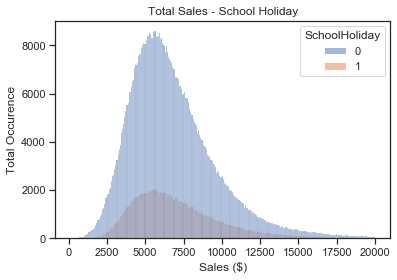

In [15]:
state = sns.histplot(data=clean_data, x="Sales", hue="SchoolHoliday")
plt.title("Total Sales - School Holiday")
plt.ylabel("Total Occurence")
plt.xlabel("Sales ($)")
plt.savefig('output/sales_schoolHoliday.png', dpi= 100)

#### Less sales when there is a school holiday

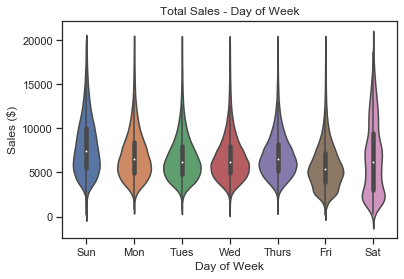

In [16]:
Day_sales = sns.violinplot(data=clean_data,x="DayOfWeek",y="Sales")
plt.title("Total Sales - Day of Week")
plt.ylabel("Sales ($)")
plt.xlabel("Day of Week")
Day_sales.set_xticklabels(["Sun", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sat"], rotation=0)
plt.savefig('output/sales_DayOfWeek.png', dpi= 100)

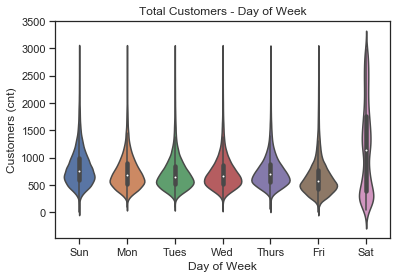

In [17]:
Day_customers = sns.violinplot(data=clean_data,x="DayOfWeek",y="Customers")
plt.title("Total Customers - Day of Week")
plt.ylabel("Customers (cnt)")
plt.xlabel("Day of Week")
Day_customers.set_xticklabels(["Sun", "Mon", "Tues", "Wed", "Thurs", "Fri", "Sat"], rotation=0)
plt.savefig('output/Customers_DayOfWeek.png', dpi= 100)

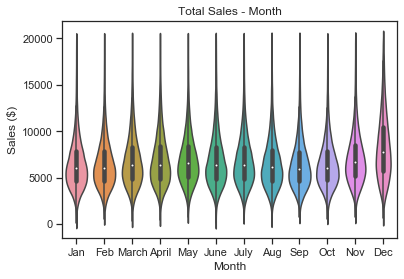

In [18]:
Month_sales = sns.violinplot(data=clean_data,x="month",y="Sales")
plt.title("Total Sales - Month")
plt.ylabel("Sales ($)")
plt.xlabel("Month")
Month_sales.set_xticklabels(["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.savefig('output/sales_month.png', dpi= 100)

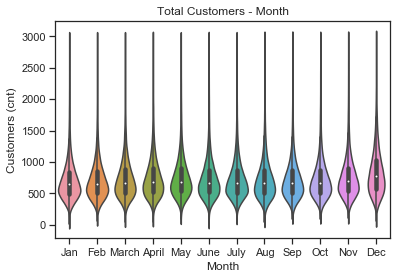

In [19]:
Month_customers = sns.violinplot(data=clean_data,x="month",y="Customers")
plt.title("Total Customers - Month")
plt.ylabel("Customers (cnt)")
plt.xlabel("Month")
Month_customers.set_xticklabels(["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0)
plt.savefig('output/customers_month.png', dpi= 100)

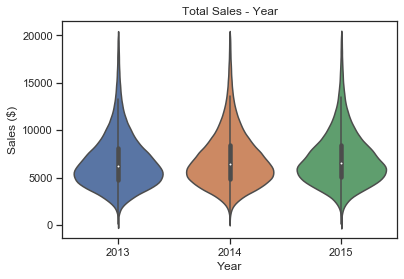

In [20]:
year_sales = sns.violinplot(data=clean_data,x="year",y="Sales")
plt.title("Total Sales - Year")
plt.ylabel("Sales ($)")
plt.xlabel("Year")
plt.savefig('output/sales_year.png', dpi= 100)

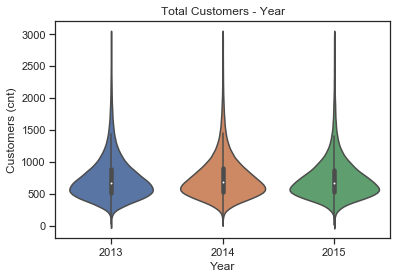

In [21]:
year_customers = sns.violinplot(data=clean_data,x="year",y="Customers")
plt.title("Total Customers - Year")
plt.ylabel("Customers (cnt)")
plt.xlabel("Year")
plt.savefig('output/customers_year.png', dpi= 100)

#### We do not observe a change in customers count and sales around over the years, or throughout the years (when observed by months). However, as we increase the granularity of our observation to day of the week, we do observe changes. We are seeing a more uniform distribution in sales amount, and wider and more uniform distribution of customers count on day 7.